Cryptokittie:2021-04-01 2021-04-30
MODEL-SAVED
1/1 [==============================] - 0s 74ms/step - loss: 0.1109
Score: 0.11086918413639069
1/1 [==============================] - 2s 2s/step


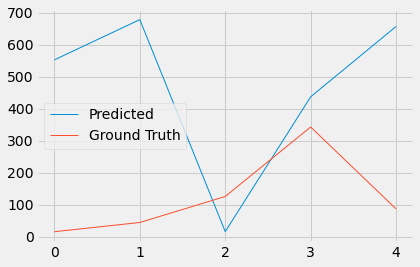

Cryptokittie  test RMSE :  454.92870758230697
Meta:2021-04-01 2021-04-30
MODEL-SAVED
1/1 [==============================] - 0s 73ms/step - loss: 0.4932
Score: 0.4931711256504059
1/1 [==============================] - 2s 2s/step


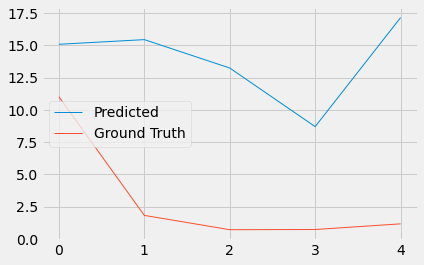

Meta  test RMSE :  11.622722795978696
Twobontanica:2021-04-01 2021-04-30
MODEL-SAVED
1/1 [==============================] - 0s 48ms/step - loss: 0.0966
Score: 0.09657858312129974
1/1 [==============================] - 2s 2s/step


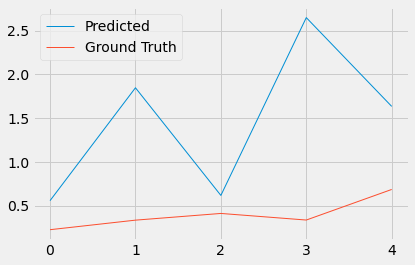

Twobontanica  test RMSE :  1.3176337278940549
    Twobontanica_Price_USD
0                 0.338871
1                 0.515565
2                 6.695033
3                 0.262984
4                 0.098776
..                     ...
91                0.558793
92                1.847779
93                0.618561
94                2.648934
95                1.635128

[96 rows x 1 columns]
Art:2021-04-01 2021-04-30
MODEL-SAVED
1/1 [==============================] - 0s 34ms/step - loss: 0.1758
Score: 0.17582948505878448
1/1 [==============================] - 2s 2s/step


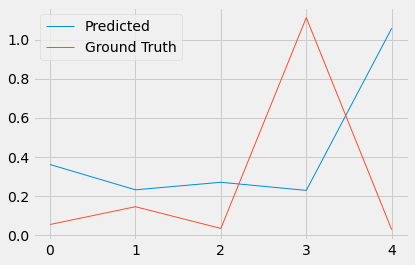

Art  test RMSE :  0.6315951815136596
    Twobontanica_Price_USD  Art_Price_USD
0                 0.338871       0.700510
1                 0.515565       1.449030
2                 6.695033       3.003495
3                 0.262984       0.120115
4                 0.098776       0.169933
..                     ...            ...
91                0.558793            NaN
92                1.847779            NaN
93                0.618561            NaN
94                2.648934            NaN
95                1.635128            NaN

[96 rows x 2 columns]
Real:2021-03-01 2021-03-31
Real:2021-04-01 2021-04-30
MODEL-SAVED
1/1 [==============================] - 0s 47ms/step - loss: 0.0158
Score: 0.01577032171189785
1/1 [==============================] - 3s 3s/step


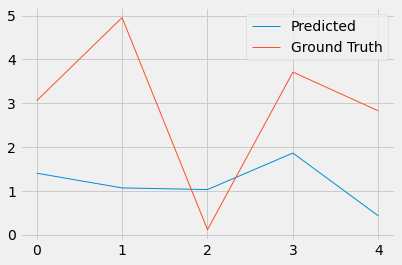

Real  test RMSE :  2.3603599310613883
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD
0                 0.338871       0.700510        0.811874
1                 0.515565       1.449030        0.930176
2                 6.695033       3.003495        0.935458
3                 0.262984       0.120115        0.934492
4                 0.098776       0.169933        6.554933
..                     ...            ...             ...
91                0.558793            NaN             NaN
92                1.847779            NaN             NaN
93                0.618561            NaN             NaN
94                2.648934            NaN             NaN
95                1.635128            NaN             NaN

[96 rows x 3 columns]
Element:2021-04-01 2021-04-30
MODEL-SAVED
1/1 [==============================] - 0s 48ms/step - loss: 0.1481
Score: 0.14812007546424866
1/1 [==============================] - 1s 1s/step


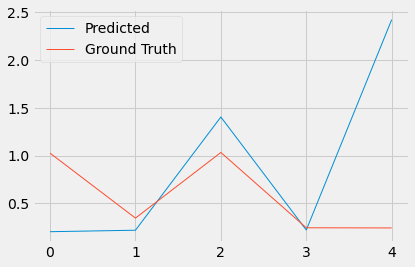

Element  test RMSE :  1.057173036509807
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD
0                 0.338871       0.700510        0.811874           3.101977
1                 0.515565       1.449030        0.930176           0.772500
2                 6.695033       3.003495        0.935458           3.109868
3                 0.262984       0.120115        0.934492          14.597647
4                 0.098776       0.169933        6.554933           7.820843
..                     ...            ...             ...                ...
91                0.558793            NaN             NaN                NaN
92                1.847779            NaN             NaN                NaN
93                0.618561            NaN             NaN                NaN
94                2.648934            NaN             NaN                NaN
95                1.635128            NaN             NaN                NaN

[96 rows x 4 columns]
Ai:2021-02-01

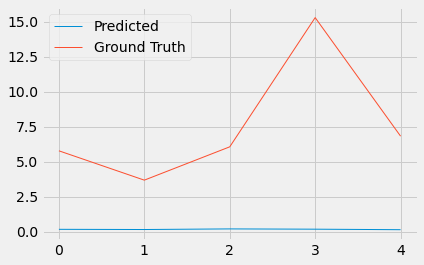

Ai  test RMSE :  8.390309511067079
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   

    

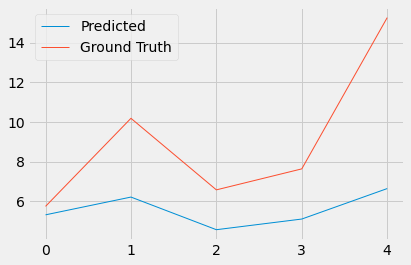

Monster  test RMSE :  4.487460413861639
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   


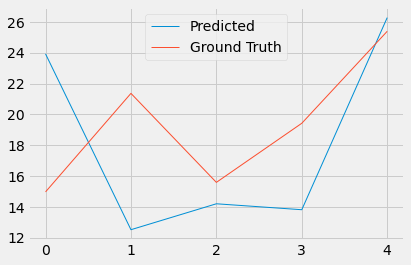

Ultra  test RMSE :  6.203896551455995
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   

 

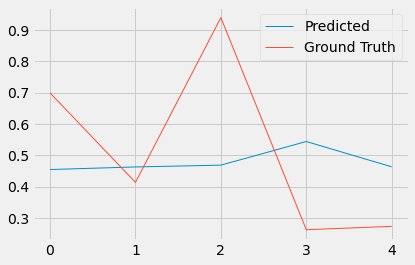

Pix  test RMSE :  0.282655767594507
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   

   

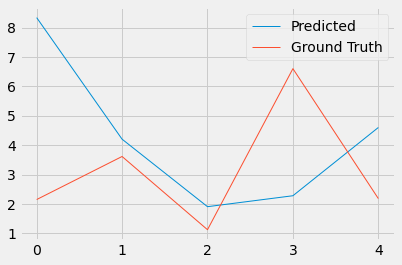

Digital  test RMSE :  3.571242544572043
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   


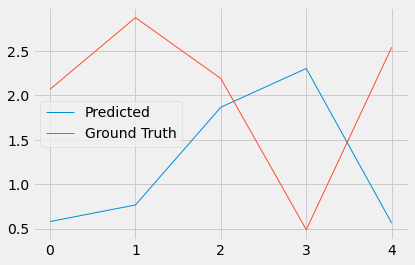

Cyber  test RMSE :  1.6720917314625925
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   



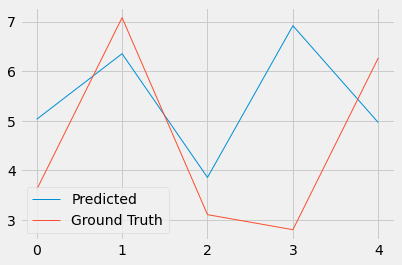

Gdz.topp  test RMSE :  2.0860767003336194
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN  

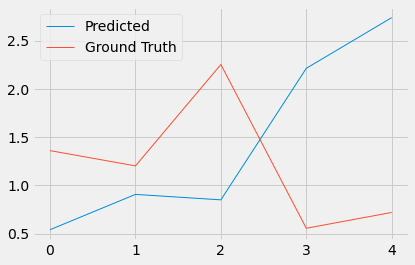

Mad  test RMSE :  1.3833041729602713
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   

  

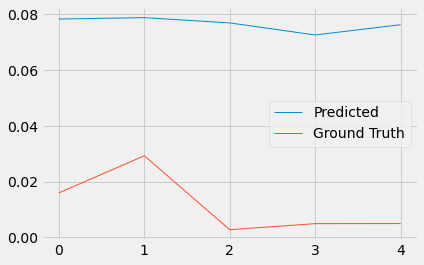

Prank  test RMSE :  0.06558742858454111
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   


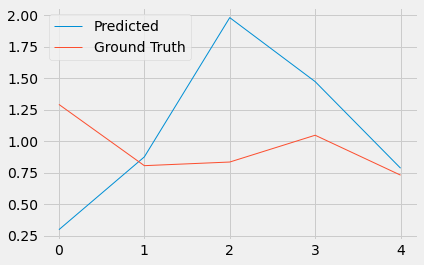

Doge  test RMSE :  0.7067999796925555
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN   

 

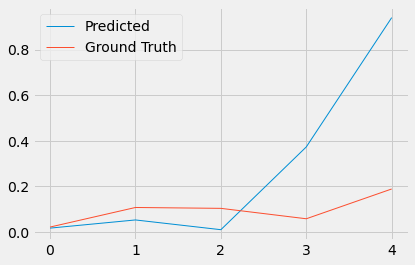

Creation  test RMSE :  0.36775147235861305
    Twobontanica_Price_USD  Art_Price_USD  Real_Price_USD  Element_Price_USD  \
0                 0.338871       0.700510        0.811874           3.101977   
1                 0.515565       1.449030        0.930176           0.772500   
2                 6.695033       3.003495        0.935458           3.109868   
3                 0.262984       0.120115        0.934492          14.597647   
4                 0.098776       0.169933        6.554933           7.820843   
..                     ...            ...             ...                ...   
91                0.558793            NaN             NaN                NaN   
92                1.847779            NaN             NaN                NaN   
93                0.618561            NaN             NaN                NaN   
94                2.648934            NaN             NaN                NaN   
95                1.635128            NaN             NaN                NaN 

In [95]:
import pandas as pd
import numpy as np 
import math  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from datetime import datetime  
from datetime import timedelta
from datetime import datetime
from math import nan, isnan
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
from pytrends import dailydata
np.random.seed(0)
from numpy import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping


data = pd.read_csv("Data_API.csv")
data


def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real NFT price", linewidth=1)
    plt.plot(predicted, color="blue", label="predicted NFT price", linewidth=1)
    plt.title("NFT price prediction")
    plt.xlabel("time")
    plt.ylabel("NFT price")
    plt.legend()
    plt.show()
    
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}".format(rmse))
    
def return_rmse_value(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    return rmse  

df_arts = data.loc[data['Category'] == "Art"]
df_arts.head()

collection_lst = df_arts['Collection_cleaned'].unique().tolist()

cllctn_lst = []
collections_pred_df = pd.DataFrame()
collections_pred_df['Collection'] = []
collections_pred_df['pd1'],collections_pred_df['pd1'],collections_pred_df['pd1'],collections_pred_df['pd1'],collections_pred_df['pd1'] = [],[],[],[],[]
collections_pred_df


data_3m_all = pd.DataFrame()


for i in collection_lst:
    Collection = i
    
    df_arts_collection = df_arts[df_arts['Collection_cleaned'] == Collection]
    
    df_arts_collection['Datetime_updated_new'] = pd.to_datetime(df_arts_collection['Datetime_updated']).apply(lambda x: x.date())

    df_arts_collection = df_arts_collection[['Datetime_updated_new', 'Price_Crypto', 'Price_USD']]

    df_arts_collection_cnt = df_arts_collection['Datetime_updated_new'].value_counts()

    df_arts_collection_cnt = pd.DataFrame(df_arts_collection_cnt)

    df_arts_collection_cnt.rename(columns={'Datetime_updated_new' : 'Num_NFTs'}, inplace = True)
    df_arts_collection_cnt.index.name='Date'
    df_arts_collection_cnt = df_arts_collection_cnt.sort_index(ascending=True)
    
    df_arts_collection = df_arts_collection.groupby('Datetime_updated_new')[['Price_Crypto', 'Price_USD']].mean()

    df_arts_collection = pd.DataFrame(df_arts_collection)
    df_arts_collection.reset_index(inplace=True)
    
    df_arts_collection = df_arts_collection.sort_values(by="Datetime_updated_new")
    
    
    # Converting dataframe to another df with index as date
    s_dict = dict()
    for i in range(len(df_arts_collection)):
        s_dict[str(df_arts_collection['Datetime_updated_new'][i])] = df_arts_collection['Price_Crypto'][i]
    s_dict
    s = pd.Series(s_dict)

    s.index = pd.DatetimeIndex(s.index)

    df1 = pd.DataFrame.from_dict(s)
    df1.columns=['Price_Crypto']
    df1.index.name='Date'
    df1


    ################################################################

    s_dict = dict()
    for i in range(len(df_arts_collection)):
        s_dict[str(df_arts_collection['Datetime_updated_new'][i])] = df_arts_collection['Price_USD'][i]
    s_dict
    s = pd.Series(s_dict)

    s.index = pd.DatetimeIndex(s.index)

    df2 = pd.DataFrame.from_dict(s)
    df2.columns=['Price_USD']
    df2.index.name='Date'
    df2


    ################################################################
    df = pd.merge(df1, df2, left_index=True, right_index=True)

    for i in range(len(df)):
        if df['Price_Crypto'][i] == 99999.000000:
            df['Price_Crypto'][i] = df['Price_USD'][i-1]
        if df['Price_USD'][i] == 99999.000000:
            df['Price_USD'][i] = df['Price_USD'][i-1]
    df 

    data1 = df[['Price_USD']].copy()
    data1
    
    data3 = pd.merge(df, df_arts_collection_cnt, left_index=True, right_index=True)
    data3

    
    
    if(len(data3)>=21):

        cllctn_lst.append(Collection)
        
        try:
            keyword = Collection
            start_d = datetime.strptime(str(data3[-21:].index[0])[:10], '%Y-%m-%d')
            end_d = datetime.strptime(str(data3[-1:].index[0])[:10], '%Y-%m-%d')
            s_year = start_d.year
            s_mon = start_d.month
            e_year = end_d.year
            e_mon = end_d.month

            daily_data = dailydata.get_daily_data(word=keyword,
                         start_year= s_year,
                         start_mon= s_mon,
                         stop_year= e_year,
                         stop_mon= e_mon,
                         geo= "",
                         verbose= True,
                         wait_time = 1.0)

            df_daily_data = daily_data.iloc[:,-1:]
            df_daily_data.rename(columns={Collection : 'Clctn_Srch_Vol'}, inplace = True)
            df_daily_data.index.name='Date'
            df_daily_data

        except KeyError:
            df_daily_data = data3[-21:].copy()
            df_daily_data['Clctn_Srch_Vol'] = [0] * 21
            df_daily_data = df_daily_data[['Clctn_Srch_Vol']]
            df_daily_data

    

    

        data3 = data3[data3['Num_NFTs'] > 2]
        data3 
                
        data_3m = data3[-96:-5][['Price_USD']].copy()
        data_3m

        data_3m.reset_index(inplace=True)
        data_3m
        
        data4 = pd.merge(data3[-21:].copy(), df_daily_data, how='left', left_on='Date', right_on='Date')
        data4

        data2 = data4.copy()
        data2

        data5 = data2[['Price_USD', 'Price_Crypto', 'Num_NFTs', 'Clctn_Srch_Vol']]
        data5

        # preparing label data
        x_data = data5.shift(-1)     
        y_label = x_data['Price_USD']
        x_data
        y_label




        # adjusting the shape of both
        data5.drop(data5.index[len(data5)-1], axis=0, inplace=True)
        y_label.drop(y_label.index[len(y_label)-1], axis=0, inplace=True)


        # conversion to numpy array
        x, y = data5.values, y_label.values
        where_are_NaNs = isnan(x)
        x[where_are_NaNs] = 0
        x


        # scaling values for model
        x_scale = MinMaxScaler()
        y_scale = MinMaxScaler()
        X = x_scale.fit_transform(x)
        Y = y_scale.fit_transform(y.reshape(-1,1))

        
        # splitting train and test
        X_train, y_train, X_test, y_test = X[:-5], Y[:-5], X[-5:], Y[-5:] 
        X_train = X_train.reshape((-1,1,4))
        X_test = X_test.reshape((-1,1,4))


        
        
        # model building - GRU-RNN
        model_name = Collection

        model = Sequential()
        model.add(GRU(units=512, return_sequences=True, input_shape=(1,4)))
        model.add(Dropout(0.2))
        model.add(GRU(units=256))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

        history = model.fit(X_train, y_train, batch_size=15, epochs=200, validation_split=0.1, verbose=0)
        model.save("{}.h5".format(model_name))
        print('MODEL-SAVED')        
        
        
        score = model.evaluate(X_test[:], y_test[:])
        print('Score: {}'.format(score))
        yhat = model.predict(X_test)
        yhat = y_scale.inverse_transform(yhat)
        y_test_data = y_scale.inverse_transform(y_test)

        
         
        if(return_rmse_value(y_test_data[-5:], yhat[-5:]) <= 10):   
            
            plt.plot(yhat[:], label='Predicted', linewidth=1)
            plt.plot(y_test_data[:], label='Ground Truth', linewidth=1)
            plt.legend()
            plt.show()

            print(Collection, " test RMSE : ", return_rmse_value(y_test_data[-5:], yhat[-5:]))    

            yhat = yhat.ravel().tolist()
     
            k = data_3m['Price_USD'].to_list()
            k.extend(yhat)

            data_3m_temp = pd.DataFrame()
            col = Collection + '_' + 'Price_USD'
            data_3m_temp[col] = k
            data_3m_all = pd.concat([data_3m_all, data_3m_temp], axis=1)
            data_3m_all

            #print(data_3m_all)


            yhat_row = [Collection] 
            yhat_row.extend(yhat) 
            yhat_row

            collections_pred_df = collections_pred_df.append(pd.Series(yhat_row, index = ["Collection","pd1","pd2","pd3","pd4","pd5"]), ignore_index=True)
            collections_pred_df

In [ ]:
# data_3m_all
# data_3m_all.to_excel('data_3m_all_arts.xlsx')

In [110]:
# Next 5 days predictions for each Collection in Arts category
collections_pred_df

,Collection,pd1,pd2,pd3,pd4,pd5
0,Splint,5.255270,4.275061,2.319775,3.084845,5.130367
1,Game,0.006854,0.028575,0.005014,0.009272,0.005170
2,Kogsofficial,1.977586,2.224654,2.572410,3.333143,3.394412
3,Alien,4.391336,4.928530,3.599284,3.104101,2.912006
4,Dark,2.244156,5.508026,5.381345,2.822159,1.598210
5,Vancitycomic,1.139441,0.067275,0.772016,0.887639,0.862462
6,Brave,0.444456,0.575849,0.995641,0.652462,0.576838
7,Battle,0.169117,0.033595,0.085754,0.033164,0.054327
8,Legend,0.128764,1.217238,0.423741,0.986116,0.820509
9,Lord,0.002949,0.002850,0.002745,0.003558,0.002654


In [ ]:
# Above scripts are for Collections in 'Arts' category, similar scripts have been implemented for 'Games' and 'Collectibles'.